# Stock Price Prediction Using Linear Regression

In [30]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Ticker,Instrument_token,Open,High,Low,Close
0,2023-09-01 09:30:00,TSLA,123456,748.50,749.88,748.04,749.88
1,2023-09-01 09:31:00,TSLA,123456,749.91,753.33,747.82,750.89
2,2023-09-01 09:32:00,TSLA,123456,751.57,751.57,749.87,751.52
3,2023-09-01 09:33:00,TSLA,123456,751.98,752.18,747.30,748.92
4,2023-09-01 09:34:00,TSLA,123456,747.30,752.12,746.68,746.68


In [32]:
series_shifted = df['Close'].shift()
df['Adj_close']=series_shifted
df.head()

,Date,Ticker,Instrument_token,Open,High,Low,Close,Adj_close
0,2023-09-01 09:30:00,TSLA,123456,748.50,749.88,748.04,749.88,NaN
1,2023-09-01 09:31:00,TSLA,123456,749.91,753.33,747.82,750.89,749.88
2,2023-09-01 09:32:00,TSLA,123456,751.57,751.57,749.87,751.52,750.89
3,2023-09-01 09:33:00,TSLA,123456,751.98,752.18,747.30,748.92,751.52
4,2023-09-01 09:34:00,TSLA,123456,747.30,752.12,746.68,746.68,748.92


In [33]:
df ['Date']=pd.to_datetime(df.Date)
df.head()

,Date,Ticker,Instrument_token,Open,High,Low,Close,Adj_close
0,2023-09-01 09:30:00,TSLA,123456,748.50,749.88,748.04,749.88,NaN
1,2023-09-01 09:31:00,TSLA,123456,749.91,753.33,747.82,750.89,749.88
2,2023-09-01 09:32:00,TSLA,123456,751.57,751.57,749.87,751.52,750.89
3,2023-09-01 09:33:00,TSLA,123456,751.98,752.18,747.30,748.92,751.52
4,2023-09-01 09:34:00,TSLA,123456,747.30,752.12,746.68,746.68,748.92


In [34]:
df.shape

(500, 8)

In [35]:
df.isnull().sum()

Date                0
Ticker              0
Instrument_token    0
Open                0
High                0
Low                 0
Close               0
Adj_close           1
dtype: int64

In [36]:
df.dropna(inplace=True)
df

,Date,Ticker,Instrument_token,Open,High,Low,Close,Adj_close
1,2023-09-01 09:31:00,TSLA,123456,749.91,753.33,747.82,750.89,749.88
2,2023-09-01 09:32:00,TSLA,123456,751.57,751.57,749.87,751.52,750.89
3,2023-09-01 09:33:00,TSLA,123456,751.98,752.18,747.30,748.92,751.52
4,2023-09-01 09:34:00,TSLA,123456,747.30,752.12,746.68,746.68,748.92
5,2023-09-01 09:35:00,TSLA,123456,747.44,753.38,747.44,753.38,746.68
...,...,...,...,...,...,...,...,...
495,2023-09-01 17:45:00,TSLA,123456,750.44,750.44,749.57,749.57,746.13
496,2023-09-01 17:46:00,TSLA,123456,752.06,752.06,747.65,751.48,749.57
497,2023-09-01 17:47:00,TSLA,123456,752.07,754.45,747.37,750.83,751.48
498,2023-09-01 17:48:00,TSLA,123456,753.43,753.43,747.64,752.26,750.83


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              499 non-null    datetime64[ns]
 1   Ticker            499 non-null    object        
 2   Instrument_token  499 non-null    int64         
 3   Open              499 non-null    float64       
 4   High              499 non-null    float64       
 5   Low               499 non-null    float64       
 6   Close             499 non-null    float64       
 7   Adj_close         499 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 35.1+ KB


In [38]:
df.describe()

,Date,Instrument_token,Open,High,Low,Close,Adj_close
count,499,499.0,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2023-09-01 13:40:00,123456.0,750.147776,752.126393,747.943808,750.071663,750.074469
min,2023-09-01 09:31:00,123456.0,744.950000,748.100000,743.750000,744.690000,744.690000
25%,2023-09-01 11:35:30,123456.0,748.820000,751.015000,746.990000,748.595000,748.605000
50%,2023-09-01 13:40:00,123456.0,750.200000,752.050000,747.980000,750.050000,750.050000
75%,2023-09-01 15:44:30,123456.0,751.435000,753.235000,748.935000,751.470000,751.470000
max,2023-09-01 17:49:00,123456.0,756.470000,756.990000,751.940000,756.060000,756.060000
std,NaN,0.0,1.951810,1.562242,1.459413,2.101631,2.100436


<Axes: >

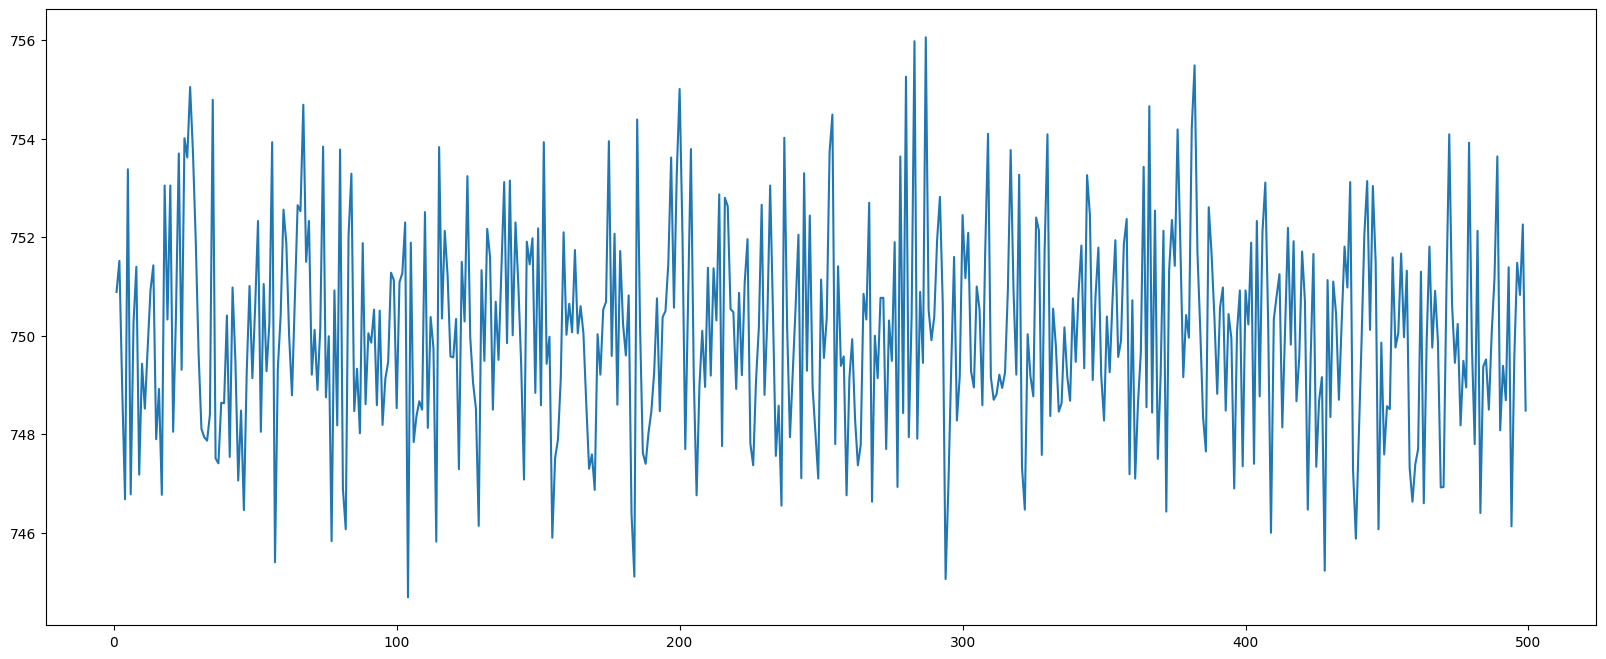

In [39]:
df['Close'].plot(figsize=(20,8))

In [40]:
x=df[['Open','Adj_close','High','Low']]
y=df['Close']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [42]:
print(x_train.shape, x_test.shape)

(374, 4) (125, 4)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor= LinearRegression()
regressor.fit (x_train,y_train)

LinearRegression()

In [44]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.27385434  0.00508055  0.74989192  0.49452563]
17.836134683570208


In [45]:
predicted= regressor.predict (x_test)
print(x_test)
print(predicted)

       Open  Adj_close    High     Low
91   747.25     750.05  750.47  747.25
255  750.32     754.49  753.55  747.80
284  749.61     755.98  753.36  747.71
445  747.44     750.12  753.04  746.92
475  750.03     749.45  753.96  747.67
..      ...        ...     ...     ...
430  751.10     751.13  751.10  748.35
50   751.89     749.14  751.89  749.13
135  750.55     748.50  750.69  750.44
365  752.12     753.43  752.44  748.55
398  750.10     750.09  750.92  747.93

[125 rows x 4 columns]
[749.31480763 751.07828865 751.09330848 751.02715971 751.37526779
 749.97150839 752.0122848  752.11918819 751.74063388 749.19507067
 748.26588205 749.56019032 749.93957788 750.36156261 749.8133825
 749.84961612 750.8937741  747.25980358 750.2617866  748.36560217
 749.22968171 752.79568785 749.60145145 749.51065936 748.68175605
 750.89504826 749.60126278 748.76020566 748.94930663 747.63812701
 750.61028938 748.88850599 751.09532133 750.22447464 752.62061889
 747.57406074 749.57298185 750.6145839  748.358

In [46]:
predicted.shape

(125,)

In [47]:
_df=pd.DataFrame({"Actual":y_test,"Predicted":predicted})
_df.head(10)


,Actual,Predicted
91,749.86,749.314808
255,747.80,751.078289
284,747.91,751.093308
445,753.04,751.027160
475,750.24,751.375268
16,748.92,749.971508
317,753.77,752.012285
489,753.64,752.119188
160,750.02,751.740634
154,749.98,749.195071


In [48]:
regressor.score(x_test,y_test)

0.17802650357680883

In [49]:
import math
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test,predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error 1.5106777151124324
Mean Square Error 3.4383656375898264
Root Mean Error 1.8542830521767237


In [50]:
predicted=regressor.predict(x)
print(predicted)

[751.01206188 750.2565628  749.33398647 750.25081594 751.52179919
 748.15084259 749.50901794 750.45803312 751.04837048 749.03144119
 748.94462583 750.34962203 749.48072699 751.39544415 748.89970798
 749.97150839 749.20860375 750.69371399 750.24747904 751.66581335
 748.51539289 749.60126278 751.55268141 752.20232807 751.29426216
 750.40146146 750.55195234 750.81668074 751.32745491 750.59969678
 747.95644385 748.78816495 749.32066736 751.06138899 750.35529722
 748.55681416 748.57081057 748.36560217 750.85520538 750.89416634
 749.15532306 749.34687325 749.58432683 750.93268684 748.61083118
 748.68175605 750.87760022 749.28160857 749.22971615 750.0340549
 749.85196176 749.70805361 749.30674108 751.77624267 749.95068696
 751.35835625 747.82821971 749.27155713 749.64472179 751.36718085
 750.02862702 750.62106652 748.84527363 748.32564998 750.43028424
 750.29291382 752.77882395 750.87870614 750.05893893 751.76764403
 750.50977622 749.79745699 749.89147875 752.20214564 750.83246353
 748.753278

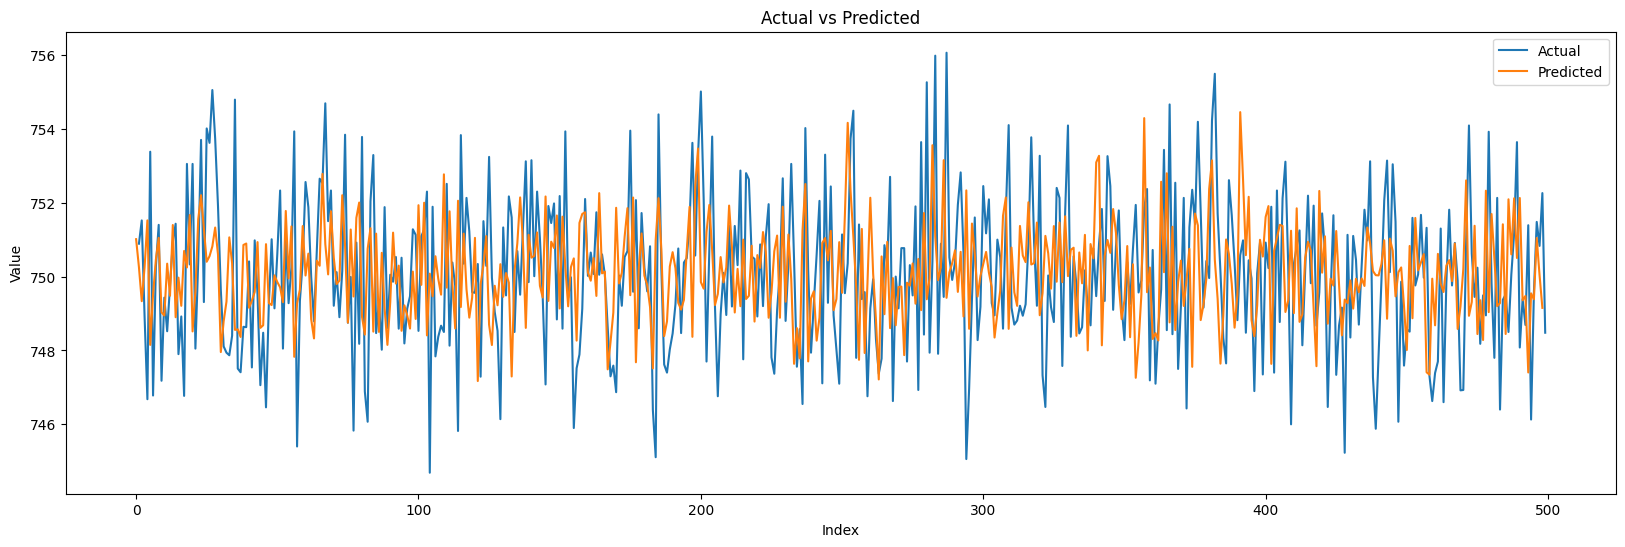

In [51]:
plt.figure(figsize=(20, 6))
plt.plot(y,label="Actual",)
plt.plot(predicted,label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()